In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb


In [2]:
df=pd.read_csv('trainny.csv')
df['pickup_datetime']=pd.to_datetime(df.pickup_datetime)
df.sort_values(by='pickup_datetime')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
96469,id0190469,2,2016-01-01 00:00:17,2016-01-01 00:14:26,5,-73.981743,40.719158,-73.938828,40.829182,N,849
223872,id1665586,1,2016-01-01 00:00:53,2016-01-01 00:22:27,1,-73.985085,40.747166,-73.958038,40.717491,N,1294
713067,id1210365,2,2016-01-01 00:01:01,2016-01-01 00:07:49,5,-73.965279,40.801041,-73.947479,40.815170,N,408
652463,id3888279,1,2016-01-01 00:01:14,2016-01-01 00:05:54,1,-73.982292,40.751331,-73.991341,40.750340,N,280
722901,id0924227,1,2016-01-01 00:01:20,2016-01-01 00:13:36,1,-73.970108,40.759800,-73.989357,40.742989,N,736
1116520,id2294362,2,2016-01-01 00:01:33,2016-01-01 00:13:25,1,-73.984993,40.773891,-73.936493,40.847771,N,712
404427,id1078247,2,2016-01-01 00:01:37,2016-01-01 00:03:31,1,-73.973335,40.764072,-73.974854,40.761734,N,114
475569,id3609443,1,2016-01-01 00:01:47,2016-01-01 00:21:51,2,-73.993103,40.752632,-73.953903,40.816540,N,1204
1019552,id2914314,2,2016-01-01 00:02:06,2016-01-01 00:23:56,1,-73.985443,40.735710,-73.957489,40.811611,N,1310
300611,id3675972,2,2016-01-01 00:02:45,2016-01-01 00:10:10,1,-73.993736,40.741760,-74.004669,40.745468,N,445


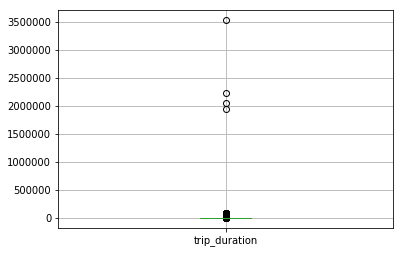

In [3]:
df.boxplot(column =['trip_duration'], grid = True) 
plt.rcParams["figure.figsize"] = (10,3)

In [4]:
bx=df['trip_duration'].values

In [5]:
bx=df['trip_duration'].values
bx=sorted(bx)
print(len(bx)/100)

14586.44


In [6]:
px=bx[14586]
lp=[]
for i in range(100):
    lp.append(bx[14586+(i*14586)])    

In [38]:
import torch
lp=torch.Tensor(lp)

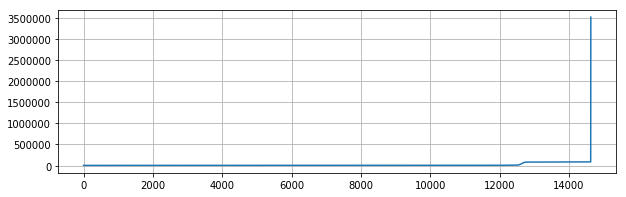

In [39]:
kp=bx[99*14586:]
plt.plot(kp, )
plt.grid()

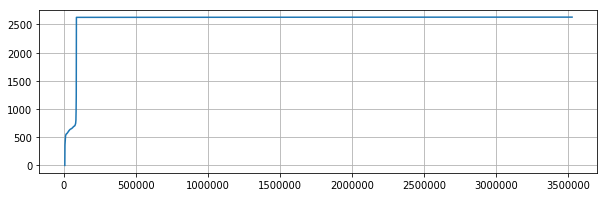

In [40]:
plt.plot(kp[12000:],  [x for x in range(len(kp[12000:]))])
plt.grid()

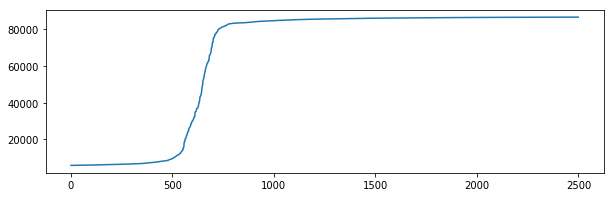

In [41]:
plt.plot(kp[12000:14500])

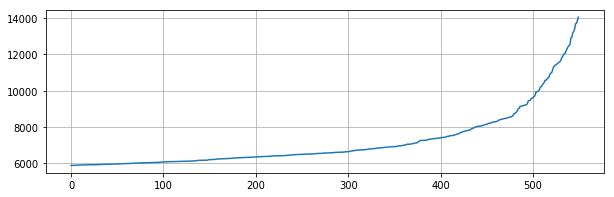

In [42]:
plt.plot(kp[12000:12550])

plt.grid()

In [43]:
q=[]
for i in range(len(kp)):
    if(kp[i]<20000):
        q.append(kp[i])
q=torch.Tensor(q)        

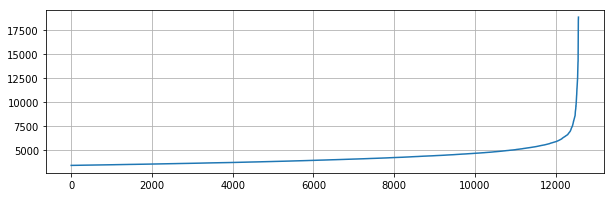

In [44]:
plt.plot(q)
plt.grid()


In [13]:
dfi=df[df['trip_duration']<7000]
dfi.shape

(1456374, 11)

In [14]:
((df.shape[0] - dfi.shape[0]) / df.shape[0] )*100

0.15562399050076645

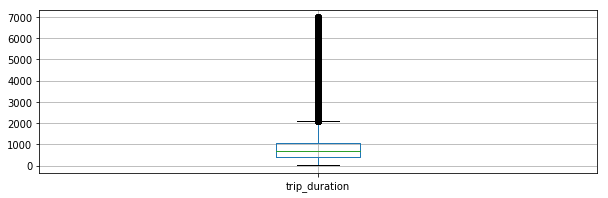

In [15]:
dfi.boxplot(column =['trip_duration'], grid = True) 

In [16]:
dfi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [17]:
outlier_locations = dfi[((dfi.pickup_longitude <= -74.15) | (dfi.pickup_latitude <= 40.5774)| \
                   (dfi.pickup_longitude >= -73.7004) | (dfi.pickup_latitude >= 40.9176))]


In [18]:
outlier_locations

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,N,27
3261,id1606138,2,2016-04-27 15:14:54,2016-04-27 15:15:01,2,-74.177780,40.690281,-74.177780,40.690281,N,7
7794,id0688948,1,2016-04-14 20:13:28,2016-04-14 20:13:43,1,-74.161804,40.836494,-74.161804,40.836494,N,15
13006,id3022813,1,2016-06-15 18:02:41,2016-06-15 18:03:18,1,-73.558289,40.781223,-73.558281,40.781227,N,37
20077,id3733479,2,2016-05-22 03:58:40,2016-05-22 03:59:02,1,-74.347069,40.708519,-74.347069,40.708523,N,22
20878,id3092519,1,2016-03-15 18:34:52,2016-03-15 18:35:34,1,-73.648560,40.657745,-73.648560,40.657742,N,42
23294,id2410009,1,2016-01-01 04:35:32,2016-01-01 04:36:12,2,-74.208260,40.831402,-74.208260,40.831402,N,40
30712,id1629558,2,2016-05-22 02:17:12,2016-05-22 02:17:20,2,-73.955093,40.942661,-73.955093,40.942661,N,8
31618,id2185383,1,2016-01-24 13:10:30,2016-01-24 13:11:12,1,-73.518051,41.091171,-73.518059,41.091167,N,42
39020,id2700498,2,2016-01-18 18:19:50,2016-01-18 18:20:06,1,-74.393555,40.785603,-74.398514,40.781822,N,16


In [45]:
s=torch.Tensor(outlier_locations.index)
type(s)

torch.Tensor

In [46]:
df1=dfi.drop(s)

In [47]:
((len(dfi)-len(df1))/len(dfi))*100

0.03378253113554623

In [22]:
import pickle
from geopy.geocoders import Nominatim
from sklearn.model_selection import train_test_split

In [23]:
df1["store_and_fwd_flag"].value_counts()

N    1447850
Y       8032
Name: store_and_fwd_flag, dtype: int64

In [24]:
f = lambda x: 0 if x == 'N' else 1

df1["store_and_fwd_flag"] = df1["store_and_fwd_flag"].apply(lambda x: f(x))            

In [25]:
df1["store_and_fwd_flag"].value_counts()

0    1447850
1       8032
Name: store_and_fwd_flag, dtype: int64

# Feature Engineering

In [26]:
#First, convert datetime strings into datetime
df1["dropoff_datetime"] = pd.to_datetime(df1["dropoff_datetime"], format='%Y-%m-%d %H:%M:%S')
df1["pickup_datetime"] = pd.to_datetime(df1["pickup_datetime"], format='%Y-%m-%d %H:%M:%S')

In [27]:
#Now construct other variables, like month, date, etc.
df1["pickup_month"] = df1["pickup_datetime"].dt.month
df1["pickup_day"] = df1["pickup_datetime"].dt.day
df1["pickup_weekday"] = df1["pickup_datetime"].dt.weekday #sample_df["pickup_weekday"] = sample_df["pickup_datetime"].dt.weekday_name
df1["pickup_hour"] = df1["pickup_datetime"].dt.hour
df1["pickup_minute"] = df1["pickup_datetime"].dt.minute

In [28]:
df1["latitude_difference"] = df1["dropoff_latitude"] - df1["pickup_latitude"]
df1["longitude_difference"] = df1["dropoff_longitude"] - df1["pickup_longitude"]

In [29]:
#Convert duration to minutes for easier interpretation
df1["trip_duration"] = df1["trip_duration"].apply(lambda x: round(x/60))  

In [31]:
#Convert trip distance from longitude and latitude differences to Manhattan distance.
df1["trip_distance"] = 0.621371 * 6371 * (abs(2 * np.arctan2(np.sqrt(np.square(np.sin((abs(df1["latitude_difference"]) * np.pi / 180) / 2))), 
                                  np.sqrt(1-(np.square(np.sin((abs(df1["latitude_difference"]) * np.pi / 180) / 2)))))) + \
                                     abs(2 * np.arctan2(np.sqrt(np.square(np.sin((abs(df1["longitude_difference"]) * np.pi / 180) / 2))), 
                                  np.sqrt(1-(np.square(np.sin((abs(df1["longitude_difference"]) * np.pi / 180) / 2)))))))

In [32]:
df1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute,latitude_difference,longitude_difference,trip_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,8,3,14,0,17,24,-0.002335,0.017525,1.372146
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,11,6,12,6,0,43,-0.007412,-0.019066,1.829440
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,35,1,19,1,11,35,-0.053852,-0.026306,5.538397
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,7,4,6,2,19,32,-0.013252,-0.002228,1.069567
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,7,3,26,5,13,30,-0.010689,0.000130,0.747485


In [33]:
df1.shape

(1455882, 19)

# Modelling 

In [34]:
X = df1.drop(["trip_duration", "id", "vendor_id", "pickup_datetime", "dropoff_datetime"], axis=1)
y = df1["trip_duration"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2018)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2019)

In [ ]:
#Define evaluation metric
def rmsle(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    return np.square(np.log(y_pred + 1) - np.log(y_true + 1)).mean() ** 0.5

In [ ]:
#XGBoost parameters 
params = {
    'booster':            'gbtree',
    'objective':          'reg:linear',
    'learning_rate':      0.05,
    'max_depth':          14,
    'subsample':          0.9,
    'colsample_bytree':   0.7,
    'colsample_bylevel':  0.7,
    'silent':             1,
    'feval':              'rmsle'
}

In [ ]:
nrounds = 2000

In [ ]:
#Define train and validation sets
dtrain = xgb.DMatrix(X_train, np.log(y_train+1))
dval = xgb.DMatrix(X_val, np.log(y_val+1))

#this is for tracking the error
watchlist = [(dval, 'eval'), (dtrain, 'train')]

In [ ]:
#Train model
gbm = xgb.train(params,
                dtrain,
                num_boost_round = nrounds,
                evals = watchlist,
                verbose_eval = True
                )

In [ ]:
#Test predictions
pred = np.exp(gbm.predict(xgb.DMatrix(X_test))) - 1

In [ ]:
#Use mean absolute error to get a basic estimate of the error
mae = (abs(pred - y_test)).mean()
mae

In [ ]:
#Take a look at feature importance
feature_scores = gbm.get_fscore()
feature_scores

In [ ]:
summ = 0
for key in feature_scores:
    summ = summ + feature_scores[key]

for key in feature_scores:
    feature_scores[key] = feature_scores[key] / summ

feature_scores

# Model Save

In [ ]:
filename = "xgb_model.sav"
pickle.dump(gbm, open(filename, 'wb')